In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 10-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9 (%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling (years)|

In [8]:
#importing dataset
le_df = pd.read_csv('Life Expectancy Data.csv')

#dropping unwanted columns
le_df.drop(['Year', 'Status'], axis=1, inplace=True)

#renaming columns
le_df.rename(columns={'Life expectancy':'Life Expectancy', 'infant deaths':'Infant Deaths', 
                      'percentage expenditure':'Percentage Expenditure',
                      'under-five deaths':'Under-Five Deaths',
                     'thinness  1-19 years':'Thinness 10-19 years',
                      'thinness 5-9 years':'Thinness 5-9 years'}, inplace=True)

#le_df.isnull().head()
#total = le_df.isnull().sum()
#total
numeric_data = le_df.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns  
for i in numeric_col:
    mean = le_df[i].mean()
    le_df[i].fillna(mean,inplace = True)
le_df = le_df.groupby('Country').mean()
#le_df

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.668929,236.185241,78.735115,1943.8750,48.74375,23.5000,91.7500,4.687387,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,132.6250,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.740179,1001.585226,97.183779,0.0000,38.42500,0.0000,96.9375,4.863012,98.3125,0.12500,9759.305728,1.275338e+07,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.243929,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,5.057387,68.5000,0.10000,7483.158469,1.275338e+07,1.65000,1.56250,0.726812,12.78750
Viet Nam,74.77500,126.5625,29.1875,3.182054,0.000000,86.301336,4232.9375,11.18750,36.5000,94.9375,5.974887,91.7500,0.14375,7483.158469,1.275338e+07,14.92500,15.62500,0.627063,11.51250
Yemen,63.86250,211.8125,39.3750,0.332054,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.063637,72.6250,0.10000,7483.158469,1.275338e+07,13.83125,13.75000,0.475500,8.50625


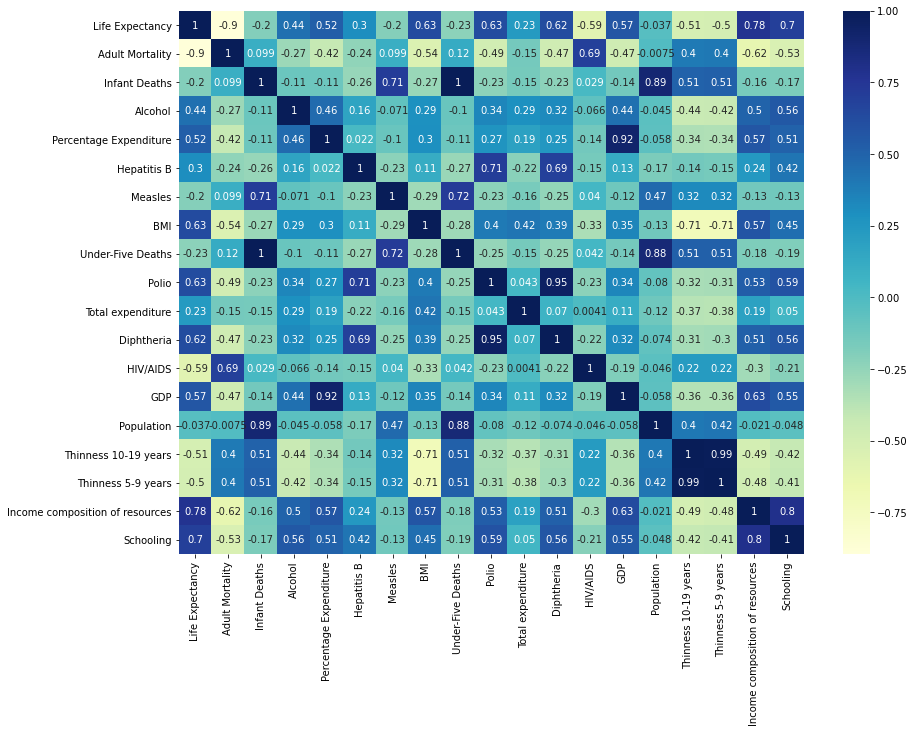

In [9]:
plt.figure(figsize = (14, 10))
sns.heatmap(le_df.corr(), annot = True, cmap="YlGnBu")

In [10]:
#splitting into dependant & independant variables
life = le_df['Life Expectancy']
features = le_df.drop(['Life Expectancy'], axis=1)

In [11]:
#splitting into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, life, test_size = 0.2, random_state = 0)

In [12]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
s_train = lin_reg.score(X_train, y_train)
print('R_square score on Training Data: %.2f' %s_train)

R_square score on Training Data: 0.93


In [13]:
#predicting
lin_reg_predict = lin_reg.predict(X_test)
lin_reg_predict

array([67.36386952, 77.14470957, 54.23206999, 46.06211419, 54.79801207,
       67.21960571, 61.04369878, 57.40082085, 69.59366781, 81.95921787,
       78.04330004, 75.34991642, 49.6030261 , 73.11308642, 80.85528097,
       54.79611785, 74.13007005, 56.29199402, 73.20371856, 67.26129784,
       78.9175693 , 68.58743181, 63.76127647, 77.78683671, 79.66852372,
       71.61788689, 56.19561329, 75.37760188, 61.37570877, 76.16801673,
       80.27008717, 70.33467866, 76.66828587, 59.16998588, 69.57913802,
       60.55629318, 57.58747192, 72.91909483, 61.53697108])

In [14]:
y_test

Country
Mongolia                                 65.887500
Poland                                   75.650000
Côte d'Ivoire                            50.387500
Nigeria                                  51.356250
South Africa                             57.500000
Nepal                                    66.481250
Bhutan                                   66.162500
Uganda                                   55.706250
San Marino                               69.224932
Australia                                81.812500
Argentina                                75.156250
Oman                                     74.843750
South Sudan                              53.875000
Morocco                                  72.156250
Ireland                                  80.150000
Eritrea                                  60.687500
Estonia                                  74.943750
Congo                                    59.043750
Romania                                  74.050000
Guyana                 

In [15]:
s_test = r2_score(y_test, lin_reg_predict)
mse = mean_squared_error(y_test, lin_reg_predict)
mae = mean_absolute_error(y_test, lin_reg_predict)
print('R_square score of Testing Data: %.2f' %s_test)
print('Mean Squared Error: %.2f' %mse)
print('Mean Absolute Error: %.2f' %mae)

R_square score of Testing Data: 0.91
Mean Squared Error: 8.10
Mean Absolute Error: 2.19


In [16]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg_fit = dec_tree_reg.fit(X_train, y_train)
s_train = dec_tree_reg.score(X_train, y_train)
print('R_square score on Training Data: %.2f' %s_train)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(dec_tree_reg_fit, X_train, y_train, cv = 5)
print('Mean Cross Validation Score: %.2f' %np.mean(cross_val))

R_square score on Training Data: 1.00
Mean Cross Validation Score: 0.76


In [17]:
#predicting
dec_tree_reg_predict = dec_tree_reg.predict(X_test)
dec_tree_reg_predict

array([69.98125, 72.85   , 53.90625, 59.1125 , 53.31875, 64.5    ,
       61.58125, 55.3125 , 67.55625, 79.25625, 74.725  , 75.725  ,
       49.01875, 71.73125, 81.3375 , 60.75625, 69.90625, 53.31875,
       73.08125, 60.8625 , 78.59375, 69.98125, 55.36875, 74.1125 ,
       82.06875, 68.7125 , 56.05   , 76.4875 , 55.36875, 75.71875,
       79.25625, 67.7125 , 77.03125, 60.8625 , 73.85625, 59.86875,
       59.4625 , 68.7125 , 59.4625 ])

In [18]:
y_test

Country
Mongolia                                 65.887500
Poland                                   75.650000
Côte d'Ivoire                            50.387500
Nigeria                                  51.356250
South Africa                             57.500000
Nepal                                    66.481250
Bhutan                                   66.162500
Uganda                                   55.706250
San Marino                               69.224932
Australia                                81.812500
Argentina                                75.156250
Oman                                     74.843750
South Sudan                              53.875000
Morocco                                  72.156250
Ireland                                  80.150000
Eritrea                                  60.687500
Estonia                                  74.943750
Congo                                    59.043750
Romania                                  74.050000
Guyana                 

In [19]:
s_test = r2_score(y_test, dec_tree_reg_predict)
mse = mean_squared_error(y_test, dec_tree_reg_predict)
mae = mean_absolute_error(y_test, dec_tree_reg_predict)
print('R_square score of Testing Data: %.2f' %s_test)
print('Mean Squared Error: %.2f' %mse)
print('Mean Absolute Error: %.2f' %mae)

R_square score of Testing Data: 0.78
Mean Squared Error: 19.34
Mean Absolute Error: 3.42


In [20]:
from sklearn.ensemble import RandomForestRegressor
ran_forest_reg = RandomForestRegressor()
ran_forest_reg_fit = ran_forest_reg.fit(X_train, y_train)
s_train = ran_forest_reg.score(X_train, y_train)
print('R_square score on Training Data: %.2f' %s_train)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(ran_forest_reg_fit, X_train, y_train, cv = 5)
print('Mean Cross Validation Score: %.2f' %np.mean(cross_val))

R_square score on Training Data: 0.99
Mean Cross Validation Score: 0.88


In [21]:
#predicting
ran_forest_reg_predict = ran_forest_reg.predict(X_test)
ran_forest_reg_predict

array([68.43111134, 74.99125   , 53.943875  , 56.2675625 , 55.0690625 ,
       65.27131113, 63.35775   , 54.5210625 , 68.91910109, 80.8696875 ,
       76.4079375 , 75.27062432, 52.89825   , 72.44737363, 80.9461875 ,
       59.0300625 , 70.44229816, 55.643875  , 72.92949932, 65.80543613,
       79.2733125 , 67.39924454, 63.23518613, 77.6399375 , 80.5743125 ,
       71.91881182, 54.2435    , 73.33806113, 68.37759221, 74.02731113,
       80.3803125 , 70.89824932, 76.409125  , 56.1755    , 72.7414959 ,
       59.97525   , 57.215125  , 72.57424795, 56.16325   ])

In [22]:
y_test

Country
Mongolia                                 65.887500
Poland                                   75.650000
Côte d'Ivoire                            50.387500
Nigeria                                  51.356250
South Africa                             57.500000
Nepal                                    66.481250
Bhutan                                   66.162500
Uganda                                   55.706250
San Marino                               69.224932
Australia                                81.812500
Argentina                                75.156250
Oman                                     74.843750
South Sudan                              53.875000
Morocco                                  72.156250
Ireland                                  80.150000
Eritrea                                  60.687500
Estonia                                  74.943750
Congo                                    59.043750
Romania                                  74.050000
Guyana                 

In [23]:
s_test = r2_score(y_test, ran_forest_reg_predict)
mse = mean_squared_error(y_test, ran_forest_reg_predict)
mae = mean_absolute_error(y_test, ran_forest_reg_predict)
print('R_square score of Testing Data: %.2f' %s_test)
print('Mean Squared Error: %.2f' %mse)
print('Mean Absolute Error: %.2f' %mae)

R_square score of Testing Data: 0.95
Mean Squared Error: 4.43
Mean Absolute Error: 1.58


Feature: 1, Score: 0.53693
Feature: 2, Score: 0.00293
Feature: 3, Score: 0.00834
Feature: 4, Score: 0.00937
Feature: 5, Score: 0.00305
Feature: 6, Score: 0.00320
Feature: 7, Score: 0.00984
Feature: 8, Score: 0.00312
Feature: 9, Score: 0.00627
Feature: 10, Score: 0.00390
Feature: 11, Score: 0.00380
Feature: 12, Score: 0.29445
Feature: 13, Score: 0.01777
Feature: 14, Score: 0.00153
Feature: 15, Score: 0.01261
Feature: 16, Score: 0.01424
Feature: 17, Score: 0.04509
Feature: 18, Score: 0.02354


<BarContainer object of 18 artists>

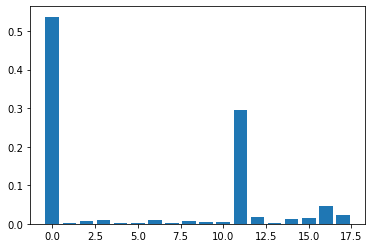

In [24]:
#Feature Importance
imp_fea = ran_forest_reg.feature_importances_
for i,v in enumerate(imp_fea):
    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(imp_fea))], imp_fea)

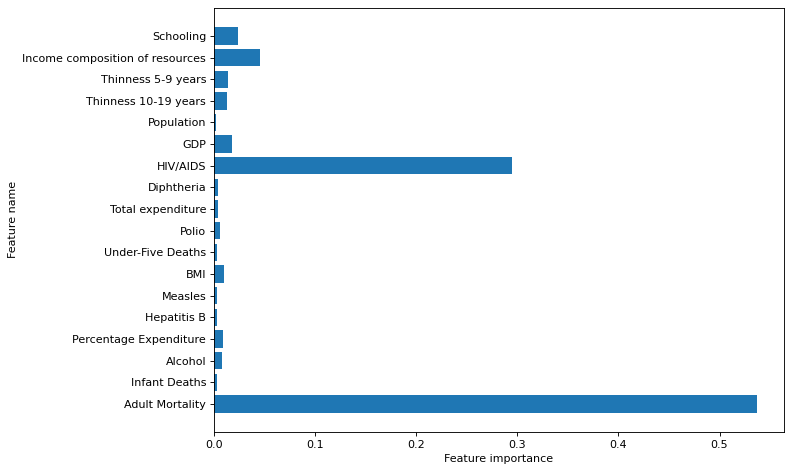

In [25]:
feature_names = ['Adult Mortality', 'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 10-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
from adspy_shared_utilities import plot_feature_importances
plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(ran_forest_reg_fit, feature_names)
plt.tight_layout()